In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [13]:
data_src='/Users/josephthomas/Documents/Projects/Data Projects/covid_death_trends/data/'

In [33]:
df_2018=pd.read_csv(data_src+'raw/2018_raw.txt',delimiter="\t")
df_2019=pd.read_csv(data_src+'raw/2019_raw.txt',delimiter="\t")
df_2020=pd.read_csv(data_src+'raw/2020_raw.txt',delimiter="\t")
df_2021=pd.read_csv(data_src+'raw/2021_raw.txt',delimiter="\t")

In [40]:
df_series=pd.read_csv(data_src+'raw/Total_deaths_time.txt',delimiter="\t")

In [108]:
df=pd.read_csv(data_src+'raw/Total_state.txt',delimiter="\t")

In [42]:
df.head()

,Notes,Residence State,Residence State Code,Year,Year Code,Month,Month Code,Deaths,Population,Crude Rate,% of Total Deaths
0,NaN,Alabama,1.0,2018,2018.0,"Jan., 2018",2018/01,5701.0,Not Applicable,Not Applicable,0.0%
1,NaN,Alabama,1.0,2018,2018.0,"Feb., 2018",2018/02,4522.0,Not Applicable,Not Applicable,0.0%
2,NaN,Alabama,1.0,2018,2018.0,"Mar., 2018",2018/03,4660.0,Not Applicable,Not Applicable,0.0%
3,NaN,Alabama,1.0,2018,2018.0,"Apr., 2018",2018/04,4406.0,Not Applicable,Not Applicable,0.0%
4,NaN,Alabama,1.0,2018,2018.0,"May, 2018",2018/05,4458.0,Not Applicable,Not Applicable,0.0%


In [101]:
grouped=df[["Year","Month","Deaths"]].groupby(["Year","Month"]).sum().reset_index()

In [102]:
grouped["Month"]=grouped["Month"].apply(lambda x:x.split(".")[0])
grouped["Month"]=grouped["Month"].apply(lambda x:x.split(",")[0])
grouped["Year"]=grouped["Year"].apply(lambda x:x.split(" ")[0])

In [107]:
grouped["Year"]=pd.to_datetime(grouped.Year,format='%Y', errors='coerce').dt.year
grouped["Month"]=pd.to_datetime(grouped.Month,format='%b', errors='coerce').dt.month

In [120]:
df1=grouped[grouped["Year"]==2018].sort_values(by="Month")
df2=grouped[grouped["Year"]==2019].sort_values(by="Month")
df3=grouped[grouped["Year"]==2020].sort_values(by="Month")
df4=grouped[grouped["Year"]==2021].sort_values(by="Month")

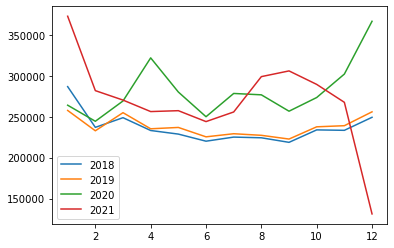

In [123]:
plt.plot("Month","Deaths",data=df1,label="2018")
plt.plot("Month","Deaths",data=df2,label="2019")
plt.plot("Month","Deaths",data=df3,label="2020")
plt.plot("Month","Deaths",data=df4,label="2021")
plt.legend()